In [22]:
import os

import cv2
import imutils
import random
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import eigh, svd
from imutils import paths
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
def image_to_feature_vector(image, size=(32, 32)):
    """
    Generates a feature vector (nx1_T),where n is
    the product of the two elements in the size tuple
    
    """
    return cv2.resize(image, size).flatten()

In [3]:
configs = {
    "dataset": "data/dogs-vs-cats",
    "jobs": -1,
    "neighbors": 3
}

In [15]:
print("[INFO] Importing dataset...")

image_paths = list(paths.list_images(configs["dataset"]))

print(f"[INFO] {len(image_paths)} images imported")

a = [10,12,13,14,15,16]

working_set = random.choices(image_paths, k=2500)

[INFO] Importing dataset...
[INFO] 25000 images imported


In [16]:
# Initializing feature matrix and labels
features = []
labels = []

# Constructig dataset
for idx, image_path in enumerate(working_set):
    img = cv2.imread(image_path)
    label = image_path.split(os.path.sep)[-1].split(".")[0]
    
    color_feats = image_to_feature_vector(img)
    norm_feats = color_feats / 255
    features.append(norm_feats)
    labels.append(label)
    
    if idx > 0 and (idx % 1000 == 0):
        print(f"[INFO] {idx} processed images")

# print(f"[INFO] 25000 processed images")

[INFO] 1000 processed images
[INFO] 2000 processed images
[INFO] 25000 processed images


In [17]:
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.25, random_state=42)

train_mtx = np.array(X_train)

In [18]:
mean_vec = np.mean(train_mtx, axis=0)
centralized_mtx = train_mtx - mean_vec
# # Devemos calcular a decomposição espectral de A = Zt*Z, mas...
# #A = np.dot(Z.transpose(), Z)
# #print(A.shape)
# #w, Q = eigh(A)
# #print('w =', np.sort(w)[::-1])

# # ... mas o tempo de processamento é proibitivo.
# # Se quisermos ver os 319 primeiros autovalores de A 
# devemos calculcar a decomposição espectral de A = Z*Zt:
A = np.dot(
    centralized_mtx, centralized_mtx.transpose())

print(A.shape)
# start_time = timeit.default_timer()
w, Q = eigh(A)
# elapsed = timeit.default_timer() - start_time
print('w =', np.sort(w)[::-1])
# print('Tempo de processamento: {:6.2f} s'.format(elapsed))

(1875, 1875)
w = [ 7.89811612e+04  4.13473679e+04  2.77928111e+04 ... -1.40357120e-13
 -1.44710279e-13 -1.72766409e-13]


In [20]:
# Calculating SVD
U, s, Vt = svd(train_mtx, full_matrices=False)
print('U shape =', np.shape(U), 's length =', len(s), 'Vt shape =', np.shape(Vt))

U shape = (1875, 1875) s length = 1875 Vt shape = (1875, 3072)


In [ ]:
def coord_reduction(train, test, n_components):
    """
    Calculate PC over train data and give the test data with n_components
    """
    U, s, Vt = svd(train_mtx, full_matrices=False)
    print('U shape =', np.shape(U), 's length =', len(s), 'Vt shape =', np.shape(Vt))
    return U[:,0:r] * s[0:r], np.dot(Xtest, Vt[0:r,:].transpose())

Text(0, 0.5, 'Variabilidade Acumulada')

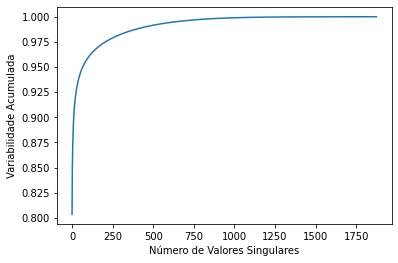

In [23]:
total_var = np.sum(s**2)
y_plot = np.cumsum(s**2) / total_var
x_plot = np.array(range(len(s)))

plt.plot(x_plot, y_plot)
plt.xlabel('Número de Valores Singulares')
plt.ylabel('Variabilidade Acumulada')